In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('PORTEFEUILLE.xlsx', index_col=0)

In [3]:
df.head()

,Nom,AO/CONSULTATION/RENEGOCIATION ANNUELLE,MIGRATION CARTE,Public ou Privé,Famille activités,Détails activités,Délais de paiement CR,Mode paiement CR,tx PS positive,tx remise sur facture,...,TX REMISE CH,TX PS POSITIVE.2,MONTANT REMISE,MONTANT PS POSITIVE,MONTANT TOTAL COM CLIENT.2,Bv Clothes mil 19,TOTAL ALL SCES FCST 2020 AVANT COVID,TAILLE ALL SERVICES 2020,TOTAL ALL SCES 2020 APRES COVID,CATEGORY OGM ALL SERVICE
N origine,,,,,,,,,,,,,,,,,,,,,
7471.0,STE MEDITERANEENE DE TELESERVICES,OUI,OUI,Prive,Call & Support Center,Call & Support Center,30.0,Bank transfer,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,9444059.486,LARGE,1.032570e+07,NaN
19990.0,MUTUELLE DU MINISTÈRE DES FINANCES,OUI,NaN,Public,Public Administration,Public administration,45.0,Check,NaN,-0.0475,...,NaN,NaN,0.0,0.0,0.0,0.0,0.000,PUBLIC,3.375736e+06,CLIENT DEV 2020
11104.0,MUTUELLE DE L ELECTRICITE ET DU GAZ,OUI,NaN,Public,Public Company,Public Companies,45.0,Bank transfer,NaN,-0.0350,...,NaN,NaN,0.0,0.0,0.0,0.0,7563288.000,PUBLIC,7.537296e+06,NaN
9234.0,AMICALE DE L'OFFICE DE L'AVIATION CIVILE ET DE...,OUI,NaN,Public,Public Company,Public Companies,45.0,Bank transfer,NaN,-0.0550,...,NaN,NaN,0.0,0.0,0.0,0.0,3156524.000,PUBLIC,2.525600e+06,CLIENT DEV 2020
12133.0,AMICALE AGENCE TUNISIENNE DE LA FORMATION PROF...,OUI,NaN,Public,Public administration,Public administration,30.0,Check,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,5860495.000,PUBLIC,4.535846e+06,NaN


In [69]:
df1=df[['Délais de paiement CR','tx remise sur facture']]

In [70]:
mean_delais_paiement=df1['Délais de paiement CR'].mean()
mean_delais_paiement

8.158614232209738

In [71]:
mean_tx_remise_facture=df1['tx remise sur facture'].mean()
mean_tx_remise_facture

-0.026542758620689607

In [72]:
df1.fillna({'Délais de paiement CR':mean_delais_paiement,'tx remise sur facture':mean_tx_remise_facture}, inplace=True)

C:\Users\fares\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [73]:
df1

,Délais de paiement CR,tx remise sur facture
N origine,,
7471.0,30.000000,-0.026543
19990.0,45.000000,-0.047500
11104.0,45.000000,-0.035000
9234.0,45.000000,-0.055000
12133.0,30.000000,-0.026543
...,...,...
14861.0,0.000000,-0.026543
19268.0,0.000000,-0.026543
15781.0,30.000000,-0.026543


In [74]:
df1.cov()

,Délais de paiement CR,tx remise sur facture
Délais de paiement CR,126.149138,-0.000744
tx remise sur facture,-0.000744,0.000003


<h1>Normalisation

In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df1)
X1=ss.transform(df1)

In [76]:
X1

array([[ 1.94475202e+00, -1.99024189e-15],
       [ 3.28034861e+00, -1.20220831e+01],
       [ 3.28034861e+00, -4.85148102e+00],
       ...,
       [ 1.94475202e+00, -1.99024189e-15],
       [ 1.94475202e+00, -1.99024189e-15],
       [ 0.00000000e+00, -1.99024189e-15]])

In [77]:
import  numpy as np
np.cov(X1.T, ddof=0)

array([[ 1.        , -0.03799985],
       [-0.03799985,  1.        ]])

<h1>Clustering

In [78]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(X1)
labels=km.predict(X1)

In [79]:
labels

array([1, 1, 1, ..., 1, 1, 0])

In [80]:
np.sum(labels==0)

7022

In [81]:
np.sum(labels==1)

1271

In [82]:
# np.sum(labels==2)

In [83]:
S0=X1[labels==0]
S1=X1[labels==1]

In [84]:
S0.shape

(7022, 2)

In [85]:
S1.shape

(1271, 2)

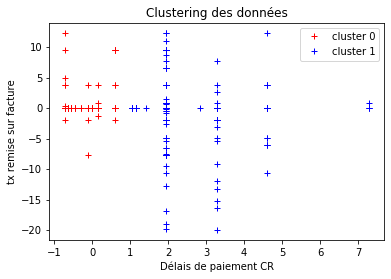

In [86]:
import matplotlib.pyplot as plt
plt.plot(S0[:,0],S0[:,1],'r+',label='cluster 0')
plt.plot(S1[:,0],S1[:,1],'b+',label='cluster 1')
plt.legend()
plt.xlabel('Délais de paiement CR')
plt.ylabel('tx remise sur facture')
plt.title('Clustering des données')
plt.show()

<h1>Clustering sur les revenus

In [87]:
df_2020=df[['TOTAL Q1 MEAL','TOTAL Q2 MEAL','TOTAL Q3 2020 ','TOTAL Q4 ']]
df_2020.head()

,TOTAL Q1 MEAL,TOTAL Q2 MEAL,TOTAL Q3 2020,TOTAL Q4
N origine,,,,
7471.0,2364336.5,2407811.5,1829931.0,2632725.5
19990.0,0.0,0.0,2640000.0,735736.0
11104.0,1982802.0,2066496.0,1387320.0,2097928.0
9234.0,1262800.0,631400.0,631400.0,0.0
12133.0,1374230.0,1899781.0,753156.0,491679.0


In [88]:
df_2020.fillna({'TOTAL Q1 MEAL': df_2020['TOTAL Q1 MEAL'].mean(),'TOTAL Q2 MEAL':df_2020['TOTAL Q2 MEAL'].mean(),'TOTAL Q3 2020 ':df_2020['TOTAL Q3 2020 '].mean(),'TOTAL Q4 ':df_2020['TOTAL Q4 '].mean()}, inplace=True)

C:\Users\fares\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [89]:
s_2020=df_2020.apply(lambda row : row['TOTAL Q1 MEAL']+row['TOTAL Q2 MEAL']+row['TOTAL Q3 2020 ']+row['TOTAL Q4 '], axis=1)
s_2020.head()

N origine
7471.0     9234804.5
19990.0    3375736.0
11104.0    7534546.0
9234.0     2525600.0
12133.0    4518846.0
dtype: float64

In [90]:
df_2019=df[['TOTAL MEAL Q1+Q2 2019','TOTAL Q3+Q4 MEAL 2019']]
df_2019.fillna({'TOTAL Q3+Q4 MEAL 2019': df_2019['TOTAL Q3+Q4 MEAL 2019'].mean(),'TOTAL MEAL Q1+Q2 2019':df_2019['TOTAL MEAL Q1+Q2 2019'].mean()}, inplace=True)
s_2019=df_2019.apply(lambda row : row['TOTAL MEAL Q1+Q2 2019']+row['TOTAL Q3+Q4 MEAL 2019'], axis=1)
s_2019.head()

N origine
7471.0     7044756.5
19990.0          0.0
11104.0    3581872.0
9234.0           0.0
12133.0    4456444.5
dtype: float64

In [91]:
import pandas as pd
df1=pd.DataFrame({'2019 Meal': s_2019,'2020 Meal': s_2020})

In [92]:
df1.cov()

,2019 Meal,2020 Meal
2019 Meal,3.808693e+12,4.040550e+12
2020 Meal,4.040550e+12,4.292406e+12


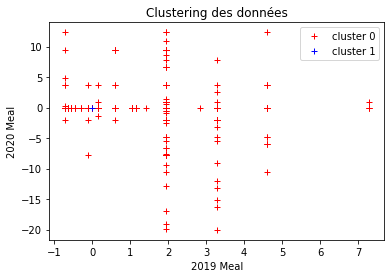

In [93]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(df1)
labels=km.predict(df1)
S0=X1[labels==0]
S1=X1[labels==1]
import matplotlib.pyplot as plt
plt.plot(S0[:,0],S0[:,1],'r+',label='cluster 0')
plt.plot(S1[:,0],S1[:,1],'b+',label='cluster 1')
plt.legend()
plt.xlabel('2019 Meal')
plt.ylabel('2020 Meal')
plt.title('Clustering des données')
plt.show()

In [94]:
S0.shape

(8292, 2)

In [95]:
S1.shape

(1, 2)

In [96]:
df=pd.read_excel('PORTEFEUILLE.xlsx', index_col=0)

In [97]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [98]:
pima = df.loc[:,[ 'Nom', 'MIGRATION CARTE', 'Public/Privé','Mode paiement CR','Délais de paiement CR']]
pima.head()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
Label = pd.get_dummies(pima['Public/Privé'], prefix='Public/Privé')
Label.head()

In [ ]:
pd.concat([pima,Label], axis=1)
pima=pd.concat([pima,Label], axis=1)
pima.head()

In [ ]:
pima.fillna('NON', inplace=True)

In [ ]:
Label = pd.get_dummies(pima['MIGRATION CARTE'], prefix='MIGRATION CARTE')
Label.head()
pd.concat([pima,Label], axis=1)
pima=pd.concat([pima,Label], axis=1)
pima.head()

In [ ]:
pima=pd.read_excel('output.xlsx', index_col=0)
pima.head()

In [ ]:
#split dataset in features and target variable
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[['Délais de paiement CR','Public/Privé_Prive']] # Features
y = pima['MIGRATION CARTE_OUI'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5)


In [ ]:
# Train Decision Tree Classifer
clf=clf.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#install on prompt 
#pip install graphviz
#pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('migration_classification.png')
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix

 

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(150,150))

plot_tree(clf,feature_names = list(pima.columns[:-1]),filled=True)

plt.show()

In [ ]:
def train_using_gini(X_train, X_test, y_train):

  

    # Creating the classifier object

    clf_gini = DecisionTreeClassifier(criterion = "gini",

            random_state = 100,max_depth=3, min_samples_leaf=5)

  

    # Performing training

    clf_gini.fit(X_train, y_train)

    return clf_gini

In [ ]:
# Function to perform training with entropy.

def tarin_using_entropy(X_train, X_test, y_train):

  

    # Decision tree with entropy

    clf_entropy = DecisionTreeClassifier(

            criterion = "entropy", random_state = 100,

            max_depth = 3, min_samples_leaf = 5)

  

    # Performing training

    clf_entropy.fit(X_train, y_train)

    return clf_entropy

In [ ]:
# Function to make predictions

def prediction(X_test, clf_object):

  

    # Predicton on test with giniIndex

    y_pred = clf_object.predict(X_test)

    print("Predicted values:")

    print(y_pred)

    return y_pred

      

# Function to calculate accuracy

def cal_accuracy(y_test, y_pred):

      

    print("Confusion Matrix: ",

        confusion_matrix(y_test, y_pred))

      

    print ("Accuracy : ",

    accuracy_score(y_test,y_pred)*100)

      

    print("Report : ",

    classification_report(y_test, y_pred))

In [ ]:
def main():

      

  

    clf_gini = train_using_gini(X_train, X_test, y_train)

    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

      

    # Operational Phase

    print("Results Using Gini Index:")

      

    # Prediction using gini

    y_pred_gini = prediction(X_test, clf_gini)

    cal_accuracy(y_test, y_pred_gini)

      

    print("Results Using Entropy:")

    # Prediction using entropy

    y_pred_entropy = prediction(X_test, clf_entropy)

    cal_accuracy(y_test, y_pred_entropy)

      

      

# Calling main function

if __name__=="__main__":

    main()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
plt.figure(figsize=(150,150))

plot_tree(clf,feature_names = list(pima.columns[:-1]),filled=True)

plt.show()

